## 데이터 그리기

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
import pandas as pd
import numpy as np
np.random.seed(42)
df = pd.read_csv('https://raw.githubusercontent.com/tonyfischetti/InteractiveLogisticRegression/master/moons.csv')
# df = df.sample(200)


<AxesSubplot:xlabel='X1', ylabel='X2'>

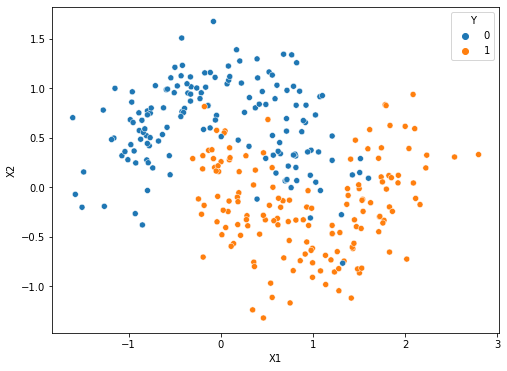

In [3]:
# 레이블에 따라 서로 다른 색깔로 표현
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='X1', y='X2', hue='Y', data=df)

In [4]:
## 독립 종속변수 나누기
X = df[['X1','X2']]
y = df['Y']

## 데이터 나누기

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True)

<AxesSubplot:xlabel='X1', ylabel='X2'>

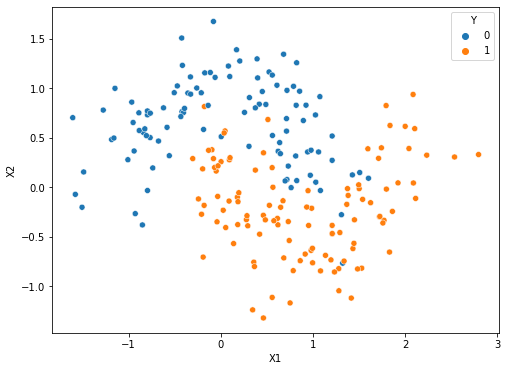

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train['X1'], y=X_train['X2'], hue=y_train)

## 로지스틱회귀

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score


def plot_classifier(degree, graph=True):
    
    ## 모델 생성
    clf = LogisticRegression()    
    
    ## 데이터 변환
    poly = PolynomialFeatures(degree=degree,include_bias=False)    
    X_train_ = poly.fit_transform(X_train)
    
    
    # 모델학습
    clf.fit(X_train_, y_train)    
    y_pred_train = clf.predict(X_train_)
    
    ## 그래프 그리기 (몰라도 됨)
    if graph:
        x1_grid, x2_grid = np.meshgrid(np.arange(-2, 3, 0.01), np.arange(-1.5, 2, 0.01))
        X_bound=np.column_stack((x1_grid.ravel(),x2_grid.ravel()))
        X_bound_ = poly.fit_transform(X_bound)
        y_bound=clf.predict(X_bound_)
        y_bound=y_bound.reshape(x1_grid.shape)
    
        # Create a contour plot with colored contours based on the density of the 'X1' and 'X2' columns    
        sns.scatterplot(X_test['X1'], X_test['X2'], hue=y_test)
        plt.contourf(x1_grid, x2_grid, y_bound, cmap='RdBu',alpha=0.3)

    # Show the plot
    plt.show()
    
    # 분류지표 계산
    X_test_ = poly.fit_transform(X_test)
    y_pred_test = clf.predict(X_test_)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test,y_pred_test)
    print(f'training MSE: {train_acc}')
    print(f'testing MSE:{test_acc}')
    
    
    return train_acc, test_acc


## 1차 로지스틱회귀

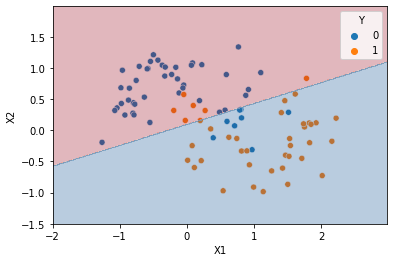

training MSE: 0.819047619047619
testing MSE:0.8444444444444444


(0.819047619047619, 0.8444444444444444)

In [8]:
plot_classifier(1)

## 2차 로지스틱회귀

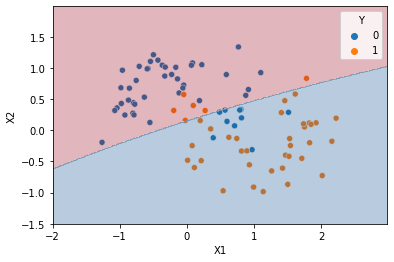

training MSE: 0.8095238095238095
testing MSE:0.8222222222222222


(0.8095238095238095, 0.8222222222222222)

In [9]:
plot_classifier(2)

## 5차 로지스틱회귀

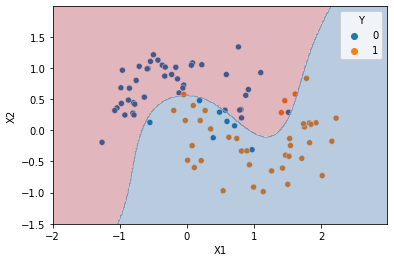

training MSE: 0.9380952380952381
testing MSE:0.8777777777777778


(0.9380952380952381, 0.8777777777777778)

In [10]:
plot_classifier(5)

## 8차 로지스틱회귀

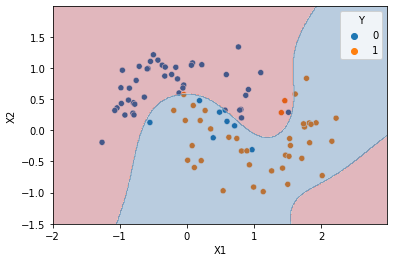

training MSE: 0.9428571428571428
testing MSE:0.8888888888888888


(0.9428571428571428, 0.8888888888888888)

In [11]:
plot_classifier(8)

## 15차 로지스틱회귀

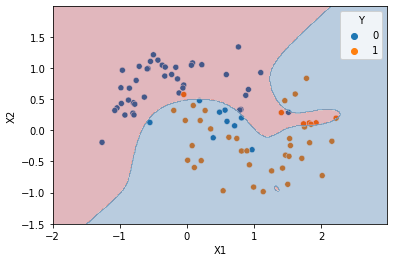

training MSE: 0.9285714285714286
testing MSE:0.8222222222222222


(0.9285714285714286, 0.8222222222222222)

In [12]:
plot_classifier(15)

## 유연성 높은 모델이 반드시 좋은가?

==========1==========
training MSE: 0.819047619047619
testing MSE:0.8444444444444444
==========2==========
training MSE: 0.8095238095238095
testing MSE:0.8222222222222222
==========3==========
training MSE: 0.9238095238095239
testing MSE:0.8777777777777778
==========4==========
training MSE: 0.919047619047619
testing MSE:0.8666666666666667
==========5==========
training MSE: 0.9380952380952381
testing MSE:0.8777777777777778
==========6==========
training MSE: 0.9380952380952381
testing MSE:0.8777777777777778
==========7==========
training MSE: 0.9428571428571428
testing MSE:0.8777777777777778
==========8==========
training MSE: 0.9428571428571428
testing MSE:0.8888888888888888
==========9==========
training MSE: 0.9428571428571428
testing MSE:0.9
==========10==========
training MSE: 0.9428571428571428
testing MSE:0.8888888888888888
==========11==========
training MSE: 0.9333333333333333
testing MSE:0.8777777777777778
==========12==========
training MSE: 0.9238095238095239
testing MSE:0

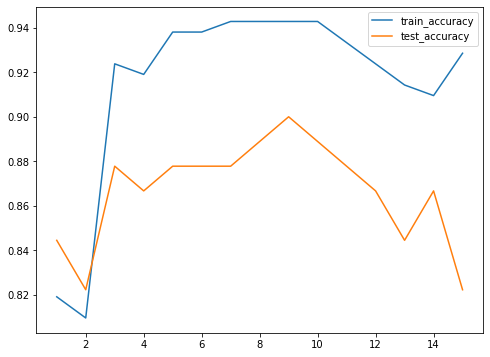

In [13]:
train_acc = []
test_acc = []
degrees = range(1,16)

for i in degrees:
    print("="*10+str(i)+"="*10)
    train, test = plot_classifier(i,graph=False)
    train_acc.append(train)
    test_acc.append(test)

plt.figure(figsize=(8,6))
plt.plot(degrees,train_acc, label = 'train_accuracy')
plt.plot(degrees,test_acc, label = 'test_accuracy')
plt.legend()
